In [1]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

# ML
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.data_fetching as data_fetching
import Components.feature_extraction as feature_extraction

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(data_fetching)
importlib.reload(feature_extraction)

<module 'Components.feature_extraction' from '../Components/feature_extraction.py'>

# Data Fetching

In [4]:
_, y = data_fetching.get_train_data()
y = np.ravel(y)

X = feature_extraction.get_features(None, precomputed='train')
X_test = feature_extraction.get_features(None, precomputed='test')

# Cross-validation

In [5]:
scaler = StandardScaler()
X_2 = scaler.fit_transform(X,y)

clf = xgb.XGBClassifier()
cv_score = cross_val_score(clf, X_2, y, cv=10, scoring='balanced_accuracy')
print(cv_score)
print(np.mean(cv_score))

# Results
# Univariate:
# [0.89757557 0.92140442 0.93921128 0.93053365 0.92786127 0.94813602
#  0.94736384 0.93639493 0.92317302 0.90670064]
# 0.9278354652022862

# Univariate + Bivariate:
[0.90347486 0.92410507 0.94056357 0.93016137 0.92783613 0.94582218
 0.95304799 0.93762358 0.92989084 0.89881094]
0.9291336524084614

[0.90347486 0.92410507 0.94056357 0.93016137 0.92783613 0.94582218
 0.95304799 0.93762358 0.92989084 0.89881094]
0.9291336524084614


In [ ]:
# TODO: Train on 2 subjects, test on the other

# n_epochs = 21600
# x_train_train = X.iloc[0:2*n_epochs]
# y_train_train = y.iloc[0:2*n_epochs]
# x_train_test = X.iloc[2*n_epochs:3*n_epochs]
# y_train_test = y.iloc[2*n_epochs:3*n_epochs]

# Prediction

(array([19719.,     0.,     0.,     0.,     0., 21937.,     0.,     0.,
            0.,  1544.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

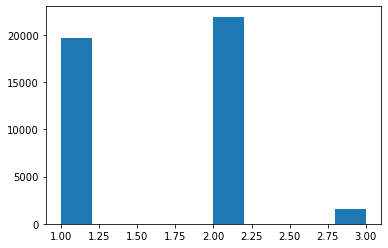

In [8]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification', xgb.XGBClassifier())])

pipe.fit(X,y)
y_pred = pipe.predict(X_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/XGB_Standard_MNE_Features_All.csv', index_label='Id')